In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV, RANSACRegressor, HuberRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error

Só vamos usar nesse notebook os dados escalonados

In [2]:
df = pd.read_csv('./melting-point/train_wc_scaled.csv')

In [3]:
melting_point={}
melting_point["data"] = df.drop(['Tm'], axis=1).values
melting_point["target"] = df["Tm"].values

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(melting_point["data"], melting_point["target"], test_size=0.1)

# Regressor Linear

In [5]:
lr = LinearRegression()

lr.fit(X_train, Y_train)
pred = lr.predict(X_test)

print("R2 score:", lr.score(X_test, Y_test))
print("Mean Absolute error:", mean_absolute_error(Y_test, pred))

R2 score: 0.3189717825482329
Mean Absolute error: 41.421055955321265


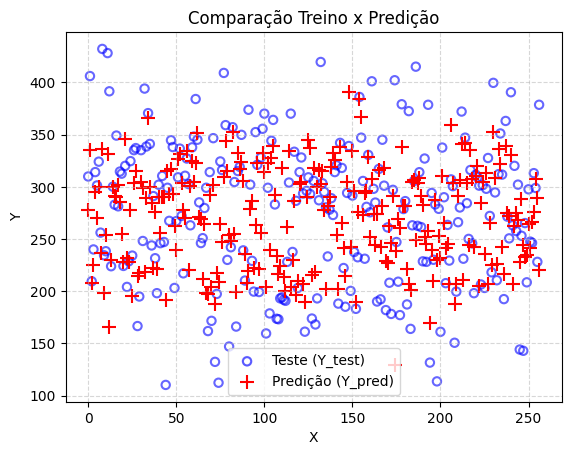

In [6]:
x_range = np.arange(0, len(X_test), 1)
plt.scatter(x_range, Y_test, color='blue', alpha=0.6, label='Teste (Y_test)', facecolors='none', edgecolors='blue', linewidths=1.5)
plt.scatter(x_range, pred, color='red', marker='+', label='Predição (Y_pred)', s=100)

plt.title("Comparação Treino x Predição")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [7]:
lr_scores = cross_val_score(lr, melting_point["data"], melting_point["target"], cv=10, scoring='neg_mean_absolute_error')
print(lr_scores)
print(lr_scores.mean())
print(lr_scores.std())

[-40.27214903 -37.25377451 -40.68374476 -36.12598732 -38.13912599
 -35.37760375 -41.83185011 -36.62048021 -40.64420559 -35.59433208]
-38.254325335502536
2.2814170823206315


# Ridge Regression

In [8]:
rg = RidgeCV(alphas=(1000.0, 100.0, 50.0, 10.0, 5.0, 4.0, 3.0, 2.0, 1.0, 0.1, 0.01, 0.05, 0.005, 0.0025, 0.001, 0.00025), cv=10)

rg.fit(X_train, Y_train)
pred = rg.predict(X_test)

print(rg.alpha_)
print("R2 score:", rg.score(X_test, Y_test))
print("Mean Absolute error:", mean_absolute_error(Y_test, pred))

50.0
R2 score: 0.3266996810831049
Mean Absolute error: 41.50826599769073


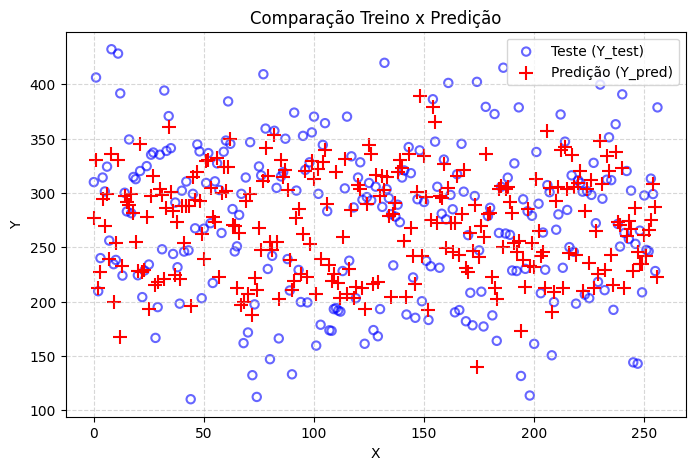

In [9]:
plt.figure(figsize=(8, 5))
x_range = np.arange(0, len(X_test), 1)
plt.scatter(x_range, Y_test, color='blue', alpha=0.6, label='Teste (Y_test)', facecolors='none', edgecolors='blue', linewidths=1.5)
plt.scatter(x_range, pred, color='red', marker='+', label='Predição (Y_pred)', s=100)

plt.title("Comparação Treino x Predição")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [10]:
rg_scores = cross_val_score(rg, melting_point['data'], melting_point['target'], cv=10, scoring="neg_mean_absolute_error")
print(rg_scores)
print(rg_scores.mean())
print(rg_scores.std())

[-40.2658982  -37.53348342 -40.88173101 -36.24600611 -38.21452199
 -35.499798   -41.86463846 -36.80705316 -40.57901284 -35.5866072 ]
-38.34787503884413
2.2506440069614344


# Lasso Regression

In [11]:
ls = LassoCV(alphas=(1000.0, 100.0, 50.0, 10.0, 5.0, 4.0, 3.0, 2.0, 1.0, 0.1, 0.01, 0.005, 0.0025, 0.001, 0.00025), cv=10, max_iter=10000)

ls.fit(X_train, Y_train)
pred = ls.predict(X_test)

print(ls.alpha_)
print("R2 score:", ls.score(X_test, Y_test))
print("Mean Absolute error:", mean_absolute_error(Y_test, pred))

0.1
R2 score: 0.32341576643824743
Mean Absolute error: 41.37874174325452


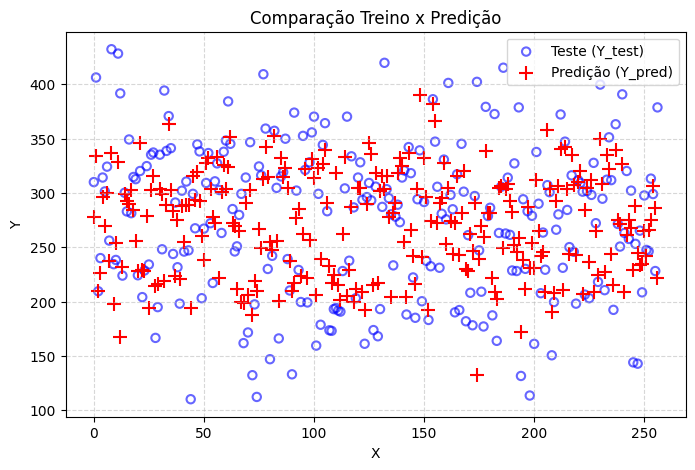

In [12]:
plt.figure(figsize=(8, 5))
x_range = np.arange(0, len(X_test), 1)
plt.scatter(x_range, Y_test, color='blue', alpha=0.6, label='Teste (Y_test)', facecolors='none', edgecolors='blue', linewidths=1.5)
plt.scatter(x_range, pred, color='red', marker='+', label='Predição (Y_pred)', s=100)

plt.title("Comparação Treino x Predição")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [13]:
ls_scores = cross_val_score(ls, melting_point['data'], melting_point['target'], cv=10, scoring='neg_mean_absolute_error')
print(ls_scores)
print(ls_scores.mean())
print(ls_scores.std())

[-40.20544065 -37.38818004 -40.67960099 -36.22925022 -38.17452763
 -35.35283894 -41.78092761 -36.70891938 -40.52177037 -35.43132792]
-38.24727837488501
2.2561087911987983


# Elastic Net

In [14]:
encv = ElasticNetCV(alphas=(1000.0, 100.0, 50.0, 10.0, 5.0, 4.0, 3.0, 2.0, 1.0, 0.1, 0.01, 0.005, 0.0025, 0.001, 0.00025), l1_ratio=(0.1, 0.25, 0.5, 0.75, 0.8, 0.9, 1),cv=10, max_iter=10000)

encv.fit(X_train, Y_train)
pred = encv.predict(X_test)

print(encv.alpha_)
print(encv.l1_ratio_)
print("R2 score:", encv.score(X_test, Y_test))
print("Mean Absolute error:", mean_absolute_error(Y_test, pred))

0.1
0.9
R2 score: 0.3253750565514355
Mean Absolute error: 41.4330214954648


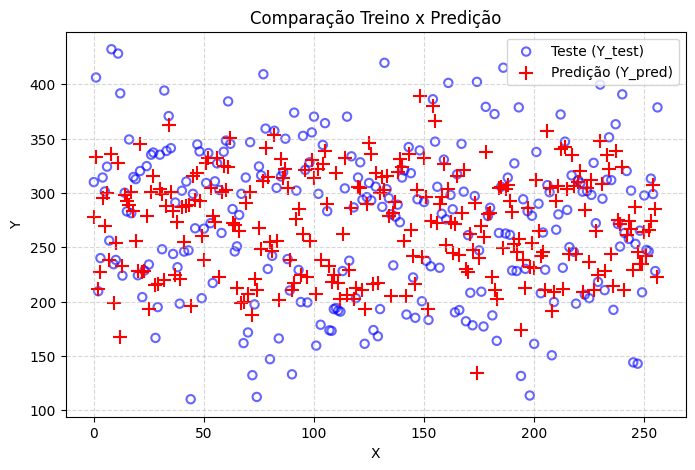

In [15]:
plt.figure(figsize=(8, 5))
x_range = np.arange(0, len(X_test), 1)
plt.scatter(x_range, Y_test, color='blue', alpha=0.6, label='Teste (Y_test)', facecolors='none', edgecolors='blue', linewidths=1.5)
plt.scatter(x_range, pred, color='red', marker='+', label='Predição (Y_pred)', s=100)

plt.title("Comparação Treino x Predição")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [16]:
encv_scores = cross_val_score(encv, melting_point['data'], melting_point['target'], cv=10, scoring='neg_mean_absolute_error')
print(encv_scores)
print(encv_scores.mean())
print(encv_scores.std())

[-40.21004655 -37.50368193 -40.77961096 -36.33317085 -38.21627253
 -35.50492765 -41.80763587 -36.78338255 -40.49913909 -35.43902286]
-38.307689084396756
2.230317847935583


# RANSAC

In [17]:
rs = RANSACRegressor()

rs.fit(X_train, Y_train)
pred = rs.predict(X_test)

print("R2 score:", rs.score(X_test, Y_test))
print("Mean Absolute error:", mean_absolute_error(Y_test, pred))

R2 score: 0.10891135407838859
Mean Absolute error: 47.83803727364484


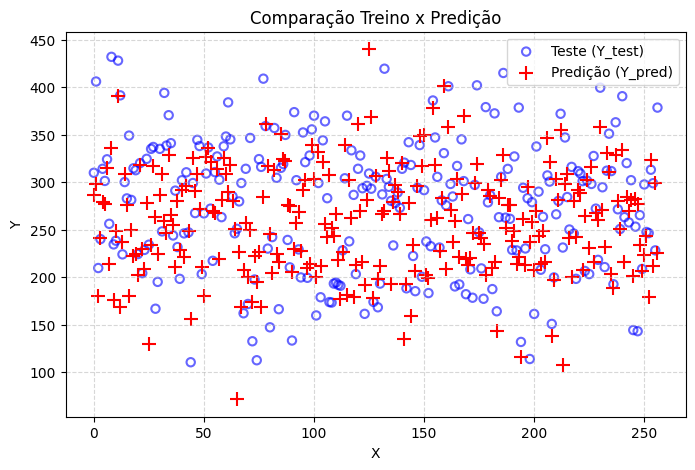

In [18]:
plt.figure(figsize=(8, 5))
x_range = np.arange(0, len(X_test), 1)
plt.scatter(x_range, Y_test, color='blue', alpha=0.6, label='Teste (Y_test)', facecolors='none', edgecolors='blue', linewidths=1.5)
plt.scatter(x_range, pred, color='red', marker='+', label='Predição (Y_pred)', s=100)

plt.title("Comparação Treino x Predição")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [19]:
rs_scores = cross_val_score(rs, melting_point['data'], melting_point['target'], cv=10, scoring='neg_mean_absolute_error')
print(rs_scores)
print(rs_scores.mean())
print(rs_scores.std())

[-50.08840437 -43.36280348 -49.41119519 -45.27017572 -50.56249862
 -46.41555803 -48.86259077 -52.69389688 -46.72829336 -48.08447878]
-48.14798952186372
2.6185375417766865


# Huber Regression

In [20]:
hr = HuberRegressor(epsilon=2.0, max_iter=1000)

hr.fit(X_train, Y_train)
pred = hr.predict(X_test)

print("R2 score:", hr.score(X_test, Y_test))
print("Mean Absolute error:", mean_absolute_error(Y_test, pred))

R2 score: 0.3137053907100045
Mean Absolute error: 40.99003162158546


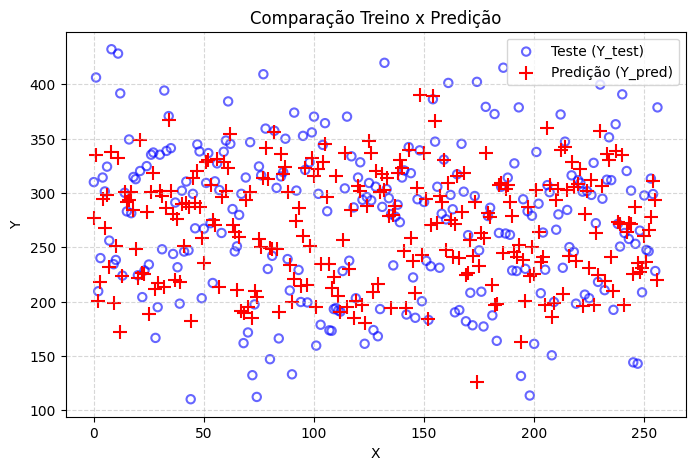

In [21]:
plt.figure(figsize=(8, 5))
x_range = np.arange(0, len(X_test), 1)
plt.scatter(x_range, Y_test, color='blue', alpha=0.6, label='Teste (Y_test)', facecolors='none', edgecolors='blue', linewidths=1.5)
plt.scatter(x_range, pred, color='red', marker='+', label='Predição (Y_pred)', s=100)

plt.title("Comparação Treino x Predição")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [22]:
hr_scores = cross_val_score(hr, melting_point['data'], melting_point['target'], cv=10, scoring='neg_mean_absolute_error')
print(hr_scores)
print(hr_scores.mean())
print(hr_scores.std())

[-40.19099977 -36.23632066 -40.141394   -35.37429753 -37.53457058
 -35.14721514 -41.67515371 -35.27082956 -40.31074399 -34.89074956]
-37.67722744942305
2.503322063339732


# Leaderboard

In [23]:
modelos = {
    "Regressor Linear": lr_scores,
    "Ridge": rg_scores,
    "Lasso": ls_scores,
    "ElasticNet": encv_scores,
    "RANSAC": rs_scores,
    "Huber": hr_scores
}

In [24]:
resultados = []
for nome, score in modelos.items():
    resultados.append({
        "Modelo": nome,
        "Média do Score": score.mean(),
        "Desvio Padrão": score.std()
    })

leaderboard = pd.DataFrame(resultados).sort_values(by="Média do Score", ascending=False)
leaderboard.reset_index(drop=True, inplace=True)

display(leaderboard.style.background_gradient(cmap="Greens").format({"Média do Score": "{:.4f}", "Desvio Padrão": "{:.4f}"}))

,Modelo,Média do Score,Desvio Padrão
0,Huber,-37.6772,2.5033
1,Lasso,-38.2473,2.2561
2,Regressor Linear,-38.2543,2.2814
3,ElasticNet,-38.3077,2.2303
4,Ridge,-38.3479,2.2506
5,RANSAC,-48.1480,2.6185
